## Evaluate different version of the NNLS model.  
This is a new line of investigation to see how much the restriction to positive weights
reduces the predictive power of the connectivity model. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats

fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2025/'

In [26]:
def plot_eval_logalpha(df,exclude_from_avrg=None): 
    data =np.unique(df['eval_dataset'])
    plt.figure(figsize=(10, 6))
    for i,ed in enumerate(data):
        D = df[df['eval_dataset']==ed] 
        plt.subplot(3,4,i+1)
        sb.lineplot(data=D,y='R_eval',x='logalpha',hue='method',legend=None)
        plt.title(ed)
        plt.axhline(y=D.group_noiseceil_Y_upper.mean(), color='g', linestyle=':', label='Between subjects (Y)')
        plt.axhline(y=D.group_noiseceil_Y_lower.mean(), color='g', linestyle='--', label='Between subjects (Y)')
    if exclude_from_avrg is not None:
        D = df[df['eval_dataset']!=exclude_from_avrg] 
    else:
        D = df
    plt.subplot(3,4,12)
    sb.lineplot(data=D,y='R_eval',x='logalpha',hue='method',legend=None)
    plt.title('Average')


## Evaluate the group L2 and NNLS models 

In [2]:
# Evaluation 
# Implemented in scripts/script_eval_cortical_act.py


##  Plot evaluations: MDTB model only

In [27]:
eval_data = ['WMFS', 'IBC', 'Demand', 'HCPur100', 'Nishimoto', 'Somatotopic','MDTB','Socialsocial', 'Languagelocalizer']
df_mdtb = rm.comb_eval(models=['MDTBgrp'],
              eval_data=eval_data,
              methods =['L2reg','NNLS'],
              cerebellum='MNISymC3')


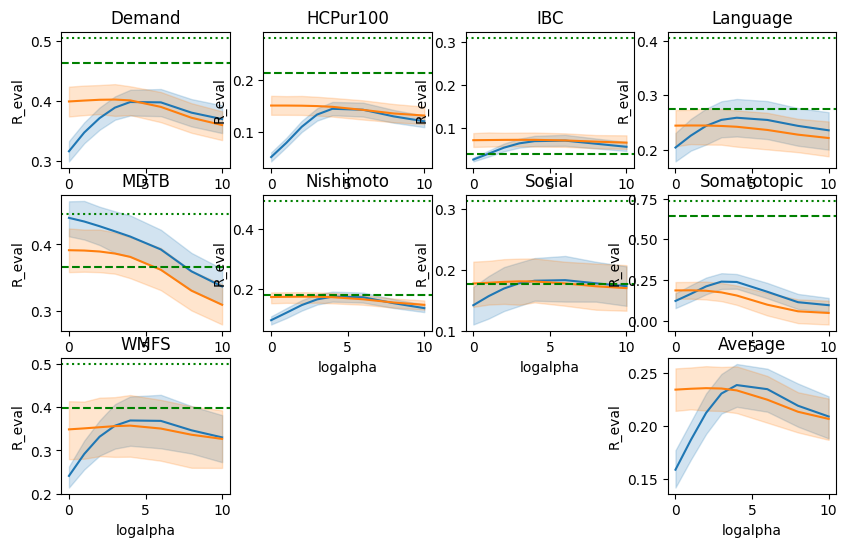

In [28]:
plot_eval_logalpha(df_mdtb,'MDTB')

## Compare models across datasets using the best logalpha

<Axes: xlabel='eval_dataset', ylabel='R_eval'>

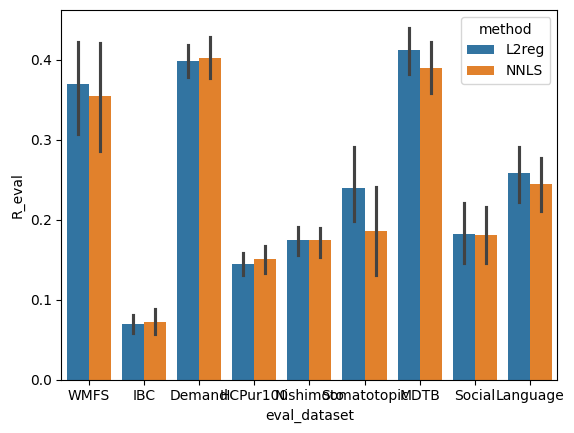

In [29]:
df_mdtb_best = df_mdtb[((df_mdtb.method=='NNLS') & (df_mdtb.logalpha==2)) | ((df_mdtb.method=='L2reg') & (df_mdtb.logalpha==4))]
sb.barplot(data=df_mdtb_best, x='eval_dataset', y='R_eval', hue='method')

# WMFS model only

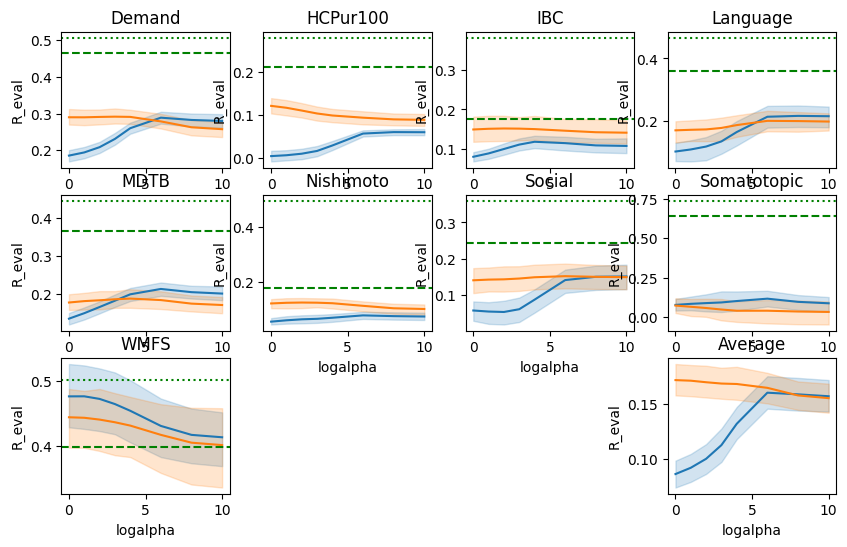

In [30]:
eval_data = ['WMFS', 'IBC', 'Demand', 'HCPur100', 'Nishimoto', 'Somatotopic','MDTB','Socialsocial', 'Languagelocalizer']
df_wfms = rm.comb_eval(models=['WMFSgrp'],
              eval_data=eval_data,
              methods =['L2reg','NNLS'],
              cerebellum='MNISymC3')
plot_eval_logalpha(df_wfms,'WMFS')

## Analyze the global model, with a leave-one-dataset-out approach

In [31]:

eval_data = ['MDTB','WMFS', 'IBC', 'Demand', 'HCPur100', 'Nishimoto', 'Somatotopic','Socialsocial', 'Languagelocalizer']
td = ['Ldo' + d for d in gl.dscode] 
df = pd.DataFrame() 
for i,ed in enumerate(eval_data): 
    for meth in ['L2reg','NNLS']:
        f = gl.conn_dir + f'/MNISymC3/eval/{ed}_{meth}_{td[i]}.tsv'
        d = pd.read_csv(f, sep='\t') 
        df = pd.concat([df,d])

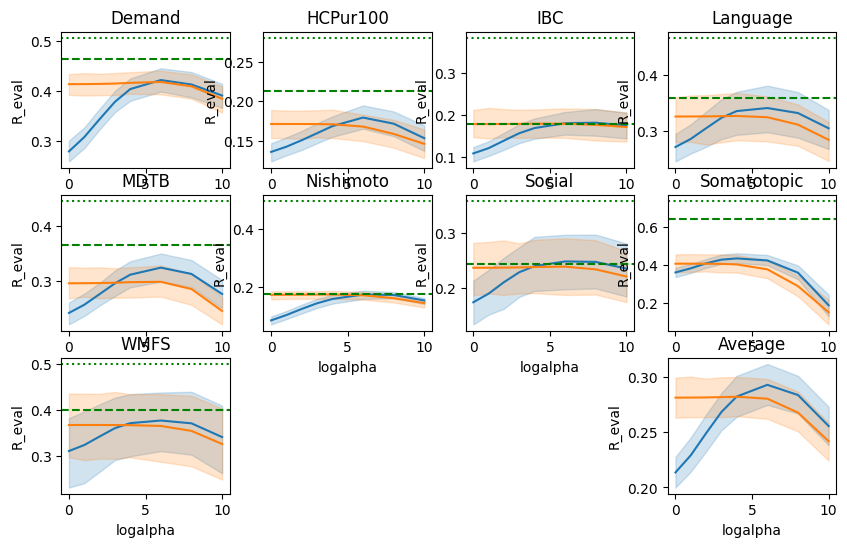

In [32]:
plot_eval_logalpha(df)

In [33]:
df_best = df[((df.method=='NNLS') & (df.logalpha==2)) | ((df.method=='L2reg') & (df.logalpha==6))]

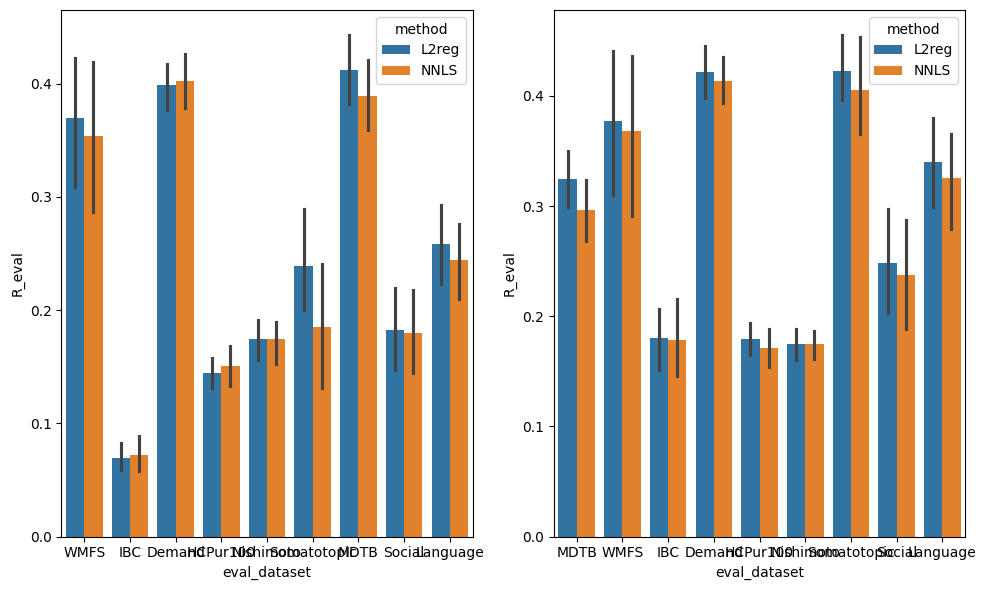

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sb.barplot(data=df_mdtb_best, x='eval_dataset', y='R_eval', hue='method')
plt.subplot(1,2,2)
sb.barplot(data=df_best, x='eval_dataset', y='R_eval', hue='method')
plt.tight_layout()